# Demo of creating manual masks
* Data from this [Google Drive link](https://drive.google.com/drive/folders/1N71DLpGBLPwUSbkZ3tYmOyuOWJbS4_Kj?usp=drive_link)

In [14]:
import sys
sys.path.append("../")
import numpy as np
from pixsed.photometry_tools import Image, Atlas
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# read the Image.
img = Image('data/NGC5194_SDSS_r.fits', coord_sky=('13h29m52.698s', '+47d11m42.93s'))

CPU times: user 19.5 s, sys: 5.21 s, total: 24.7 s
Wall time: 26.1 s


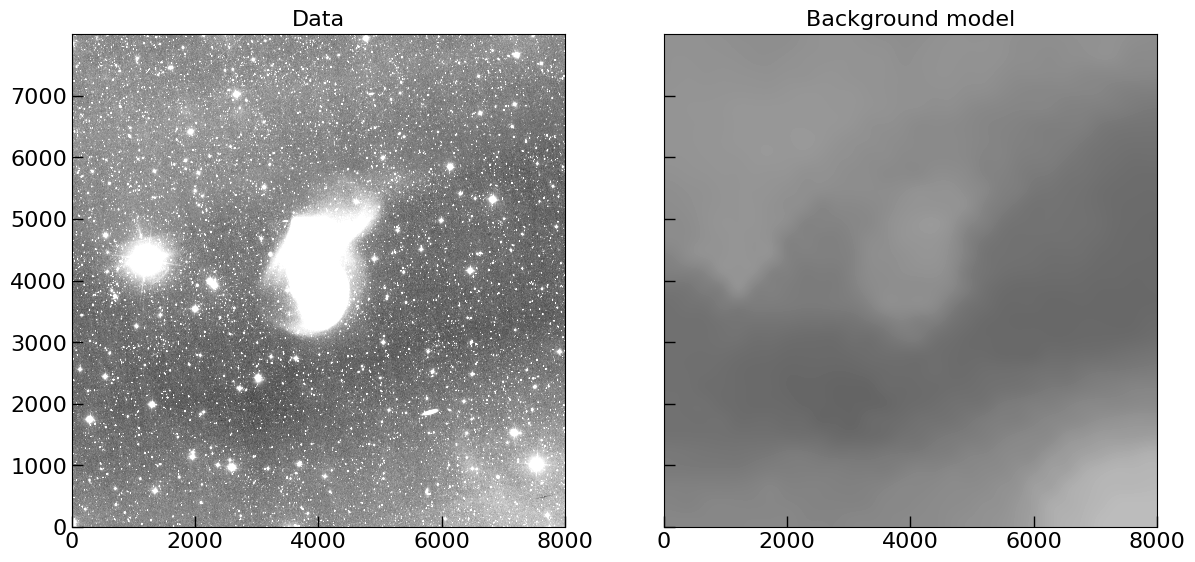

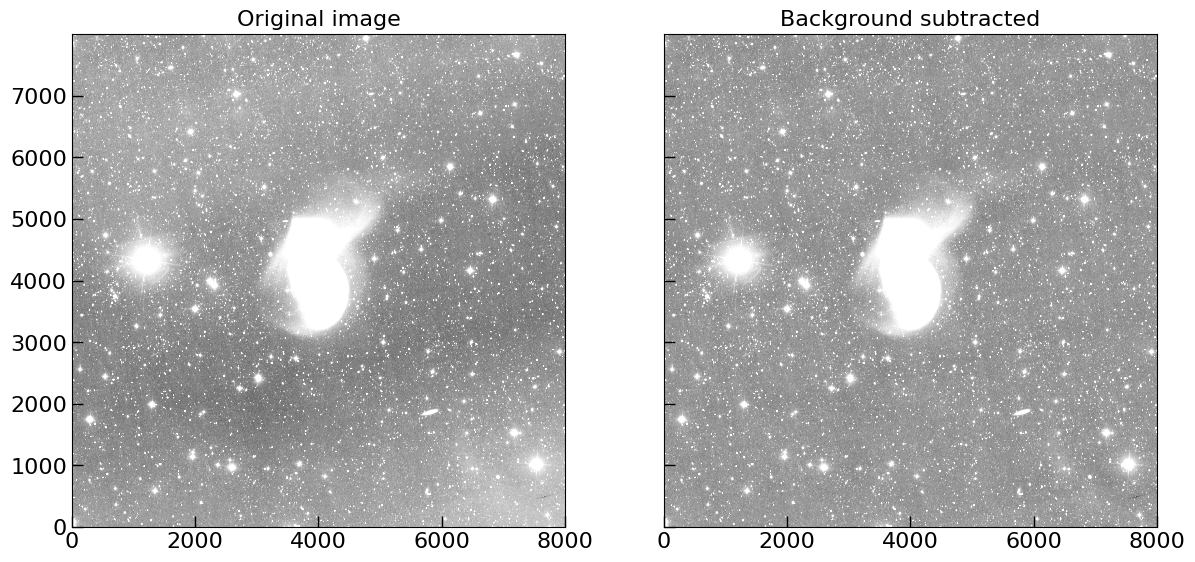

In [3]:
%%time

img.background_properties(mask_type='quick', sigma=3, maxiters=5, f_sample=0.01)
threshold = img._bkg_std
img.gen_mask_background(threshold, kernel_fwhm=10, expand_factor=1.5, plot=False, 
                        norm_kwargs=dict(percent=90, stretch='asinh', asinh_a=0.5),
                        interactive=False)

# It is important not to use a very small box_size!
box_size = img._data.shape[0] // 30
img.gen_model_background(box_size=box_size, filter_size=5, plot=True, norm_kwargs=dict(percent=80, asinh_a=0.1))
img.background_subtract(plot=True, norm_kwargs=dict(percent=90, stretch='asinh', asinh_a=0.5))

### Demonstrate the `gen_mask_manual` function

Found 0 masks!


0it [00:00, ?it/s]


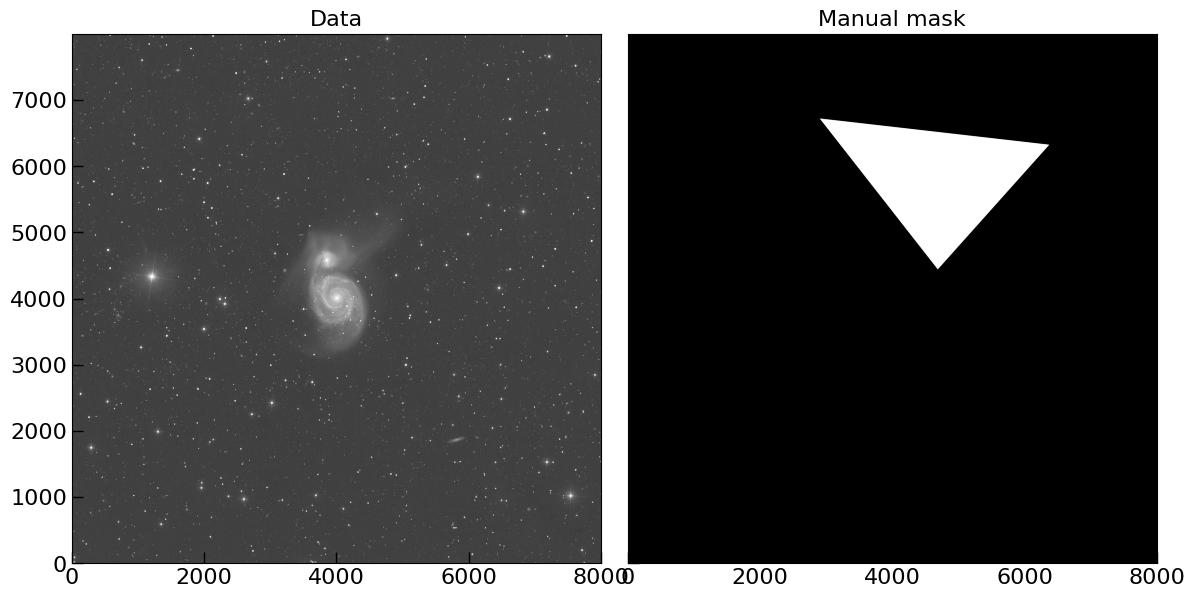

In [11]:
# Select some segments
img.gen_mask_manual(mode='draw', verbose=True)

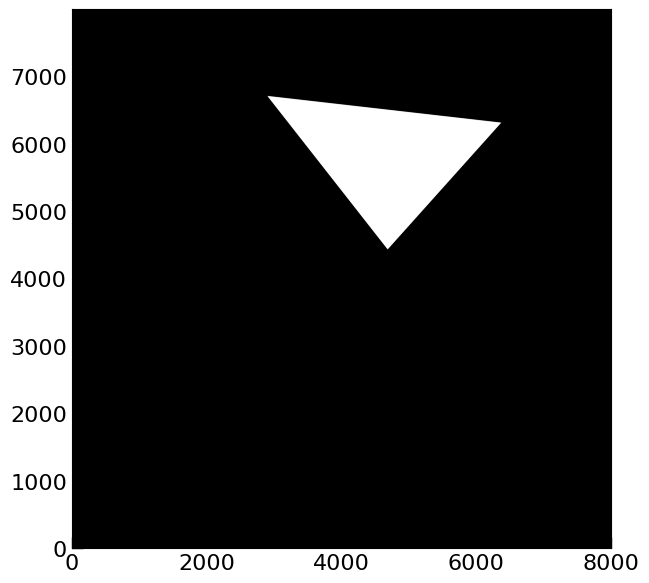

In [12]:
# Plot the manual mask
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img._mask_manual, origin='lower', cmap='Greys_r')
plt.show()